In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

/kaggle/input/szeged-weather/weatherHistory.csv


In [2]:
# 10.1.1
weather = pd.read_csv("../input/szeged-weather/weatherHistory.csv")
weather.head(20)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [3]:
# Contando a quantidade de NaN
weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Como os NaN's aparecem somente na coluna "Precip Type", podemos concluir que as linhas com NaN indicam que não houve chuva naquele determinado momento.

In [4]:
# estatística
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Aparentemente a coluna "Loud Cover" tem zeros em todas as linhas

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Loud Cover'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>]], dtype=object)

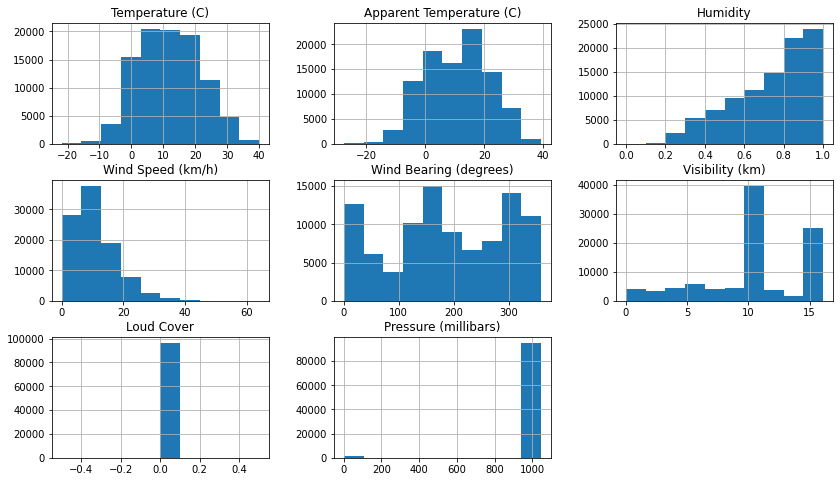

In [5]:
# Plotando os histogramas
weather.hist(figsize = [14,8])

A coluna "Pressure (millibars)" tem diversos zeros

In [6]:
pzeros = weather.loc[weather['Pressure (millibars)'] == 0]
pzeros.shape
#pzeros.index

(1288, 12)

Temos 1288 linhas com valores errados de pressão

In [7]:
# 10.1.2
print(weather.dtypes)
numfeat = [coln for coln in weather.columns if weather[coln].dtype in ['float64','int64']]
print(numfeat)
catfeat = [coln for coln in weather.columns if weather[coln].dtype == 'object'] #weather[coln].nunique() < 10 and  weather[coln].dtype == 'object']

# a data está como object

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object
['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']


In [8]:
# valores únicos das features categóricas
weather[catfeat].nunique()
print(weather['Summary'].value_counts())
print(weather['Daily Summary'].value_counts())

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [9]:
# 10.2.1
# Transformando a data
weather[['Formatted Date','Timezone']] = weather['Formatted Date'].str.split("+",n=1,expand = True)
timezone = weather.pop('Timezone')
display(weather)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [10]:
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'])
weather.dtypes
# Obtendo as novas colunas
weather['Hour'] = weather['Formatted Date'].dt.hour
weather['Day'] = weather['Formatted Date'].dt.day
weather['Month'] = weather['Formatted Date'].dt.month
weather['Year'] = weather['Formatted Date'].dt.year
weather = weather.drop(['Formatted Date'],axis = 1)
display(weather)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Hour,Day,Month,Year
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0,1,4,2006
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,1,1,4,2006
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2,1,4,2006
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,3,1,4,2006
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4,1,4,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,19,9,9,2016
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,20,9,9,2016
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,21,9,9,2016
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,22,9,9,2016


In [11]:
#10.2.2
weather = weather.drop('Loud Cover',axis =1)

In [12]:
rlist = ['Windy and Dry','Dangerously Windy and Partly Cloudy','Breezy and Dry']
drop = weather.loc[weather['Summary'].isin(rlist)]
weather = weather.drop(drop.index)
weather['Summary'].value_counts()

Partly Cloudy               31733
Mostly Cloudy               28094
Overcast                    16597
Clear                       10890
Foggy                        7148
Breezy and Overcast           528
Breezy and Mostly Cloudy      516
Breezy and Partly Cloudy      386
Dry and Partly Cloudy          86
Windy and Partly Cloudy        67
Light Rain                     63
Breezy                         54
Windy and Overcast             45
Humid and Mostly Cloudy        40
Drizzle                        39
Windy and Mostly Cloudy        35
Breezy and Foggy               35
Dry                            34
Humid and Partly Cloudy        17
Dry and Mostly Cloudy          14
Rain                           10
Windy                           8
Humid and Overcast              7
Windy and Foggy                 4
Name: Summary, dtype: int64

In [13]:
# definindo imputers
numfeat = [coln for coln in weather.columns if weather[coln].dtype in ['float64','int64']]
catfeat = [coln for coln in weather.columns if (weather[coln].dtype == 'object') & (coln != 'Daily Summary')]
features = numfeat + catfeat
y = weather.pop('Daily Summary')
numerical_transformer = SimpleImputer(strategy='mean',add_indicator = True)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encode', OrdinalEncoder())])
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numfeat),('cat', categorical_transformer, catfeat)])



In [14]:
# 10.2.3
# data split
X_train, X_valid, y_train, y_valid = train_test_split(weather, y, test_size=0.3,stratify = y)
display(y_valid)
#aplicando o transformer
X_train = preprocessor.fit_transform(X_train)
#X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)




# label encoding target
le = LabelEncoder()
#le.fit(y_train)
y_valid = le.fit_transform(y_valid)
y_train = le.transform(y_train)

display(y_valid)
print(catfeat)

93274                                Foggy in the morning.
57969                    Partly cloudy starting overnight.
42050                    Mostly cloudy throughout the day.
75026                    Partly cloudy throughout the day.
15390    Partly cloudy until night and breezy starting ...
                               ...                        
68828                                     Foggy overnight.
28343                       Foggy starting in the evening.
83582                    Mostly cloudy throughout the day.
677      Partly cloudy starting in the morning continui...
33444                         Overcast throughout the day.
Name: Daily Summary, Length: 28935, dtype: object

array([ 35, 188, 111, ..., 111, 166, 143])

['Summary', 'Precip Type']


In [15]:
# 10.3.1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
print(features)
display(X_train)
X_train.shape # 13 features

# construção do modelo
model = keras.Sequential([
    layers.BatchNormalization(input_shape=[13]),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(214, activation='softmax'),
]) 

# transformando o target
y_train = tf.keras.utils.to_categorical(
    y_train, num_classes=None)
print(y_train.shape)
y_valid = tf.keras.utils.to_categorical(
    y_valid, num_classes=None)
print(y_valid.shape)
# temos 214 classes diferentes

['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'Hour', 'Day', 'Month', 'Year', 'Summary', 'Precip Type']


array([[ 6.11111111e+00,  1.10555556e+00,  6.50000000e-01, ...,
         2.01200000e+03,  2.00000000e+00,  0.00000000e+00],
       [-3.87222222e+00, -3.87222222e+00,  8.90000000e-01, ...,
         2.00700000e+03,  1.00000000e+01,  1.00000000e+00],
       [ 2.70666667e+01,  2.85777778e+01,  6.50000000e-01, ...,
         2.01600000e+03,  1.50000000e+01,  0.00000000e+00],
       ...,
       [ 3.88888889e+00,  2.22222222e-01,  8.90000000e-01, ...,
         2.01200000e+03,  1.60000000e+01,  0.00000000e+00],
       [ 8.83888889e+00,  6.12777778e+00,  8.30000000e-01, ...,
         2.01500000e+03,  1.60000000e+01,  0.00000000e+00],
       [ 1.66888889e+01,  1.66888889e+01,  8.70000000e-01, ...,
         2.01500000e+03,  1.50000000e+01,  0.00000000e+00]])

(67515, 214)
(28935, 214)


2022-09-10 15:29:07.745854: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
# otimizador
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 13)                52        
_________________________________________________________________
dense (Dense)                (None, 256)               3584      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1

2022-09-10 15:29:08.232590: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
20/20 [==============================] - 3s 83ms/step - loss: 4.8855 - categorical_accuracy: 0.1276 - val_loss: 275.8000 - val_categorical_accuracy: 0.0279
Epoch 2/1000
20/20 [==============================] - 1s 68ms/step - loss: 3.8776 - categorical_accuracy: 0.2159 - val_loss: 318.6713 - val_categorical_accuracy: 0.0095
Epoch 3/1000
20/20 [==============================] - 2s 99ms/step - loss: 3.5188 - categorical_accuracy: 0.2366 - val_loss: 308.2342 - val_categorical_accuracy: 0.0095
Epoch 4/1000
20/20 [==============================] - 1s 71ms/step - loss: 3.3194 - categorical_accuracy: 0.2515 - val_loss: 279.2101 - val_categorical_accuracy: 0.0095
Epoch 5/1000
20/20 [==============================] - 1s 70ms/step - loss: 3.1903 - categorical_accuracy: 0.2594 - val_loss: 248.0049 - val_categorical_accuracy: 0.0095
Epoch 6/1000
20/20 [==============================] - 1s 68ms/step - loss: 3.0827 - categorical_accuracy: 0.2654 - val_loss: 205.7139 - val_categorical_acc

<AxesSubplot:>

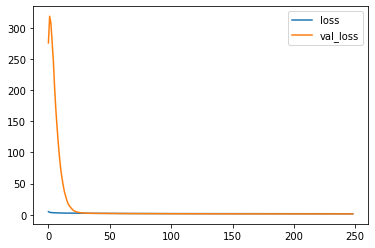

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)
# treinamento
model.summary()
trainh = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=3500,
    epochs=1000, # mais epochs já que tem early stopping
    callbacks = [early_stopping]
)
trainhdf = pd.DataFrame(trainh.history)
trainhdf.loc[:, ['loss', 'val_loss']].plot()